In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
data_path = r'C:\Users\filimon.hailemariam\Downloads\Week_0\data\benin-malanville.csv'
df = pd.read_csv(data_path)


Relative path 

In [3]:
data_path = '../data/benin-malanville.csv'
df = pd.read_csv(data_path)

In [4]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
# --- 1. Summary statistics for numeric columns ---
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [6]:
# --- 2. Count missing values in each column ---
missing_counts = df.isna().sum()
display(missing_counts)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [7]:
# --- 3. Compute percentage of missing values per column ---
missing_percent = (df.isna().sum() / len(df)) * 100
display(missing_percent)

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

In [8]:
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [9]:
# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [10]:
# Combine counts and percentages into a single DataFrame
missing_report = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_percent': missing_percent.round(2)
})
display(missing_report)


,missing_count,missing_percent
Timestamp,0,0.0
GHI,0,0.0
DNI,0,0.0
DHI,0,0.0
ModA,0,0.0
ModB,0,0.0
Tamb,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0


In [11]:
# --- 4. List columns with >5% missing values ---
high_missing = missing_report[missing_report['missing_percent'] > 5]
display(high_missing)

,missing_count,missing_percent
Comments,525600,100.0


In [12]:

# --- printouts for clarity ---
print("🔹 Summary Statistics completed.")
print(f"🔹 Total columns analyzed: {df.shape[1]}")
print(f"🔹 Columns with >5% missing values: {list(high_missing.index)}")


🔹 Summary Statistics completed.
🔹 Total columns analyzed: 19
🔹 Columns with >5% missing values: ['Comments']


In [13]:
# we can see the Comments column is not there anymore
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [14]:
df = df.drop(columns=['Comments'])

In [15]:
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')

In [16]:
print(df.duplicated().sum())

0


In [17]:
Target_Column = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
print(Target_Column)

['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


In [18]:
df[Target_Column].describe()

,GHI,DNI,DHI,ModA,ModB,WS,WSgust
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,2.121113,2.809195
std,331.131327,261.710501,158.691074,326.894859,316.536515,1.603466,2.029120
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,0.000000,0.000000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,1.000000,1.300000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,1.900000,2.600000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,3.100000,4.100000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,19.500000,26.600000


GHI, DNI and DHI has a negative value in them so we cann't have a negative value of those sensors ,negative means they are giving radiation so we have to make them 0 since it is sensor error


In [19]:
# Define which irradiance/sensor columns you want to fix
cols_to_fix = ["GHI", "DNI", "DHI"]
# Clip any negative values to zero (enforces physical constraint: irradiance ≥ 0)
df[cols_to_fix] = df[cols_to_fix].clip(lower=0)

# Quick verification summary
print("\nAfter fixing negative values:")
print(df[cols_to_fix].describe())



After fixing negative values:
                 GHI            DNI            DHI
count  525600.000000  525600.000000  525600.000000
mean      241.958821     167.441866     116.993033
std       330.101787     261.547532     157.463619
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         1.800000       0.000000       1.600000
75%       483.400000     314.200000     216.300000
max      1413.000000     952.300000     759.200000


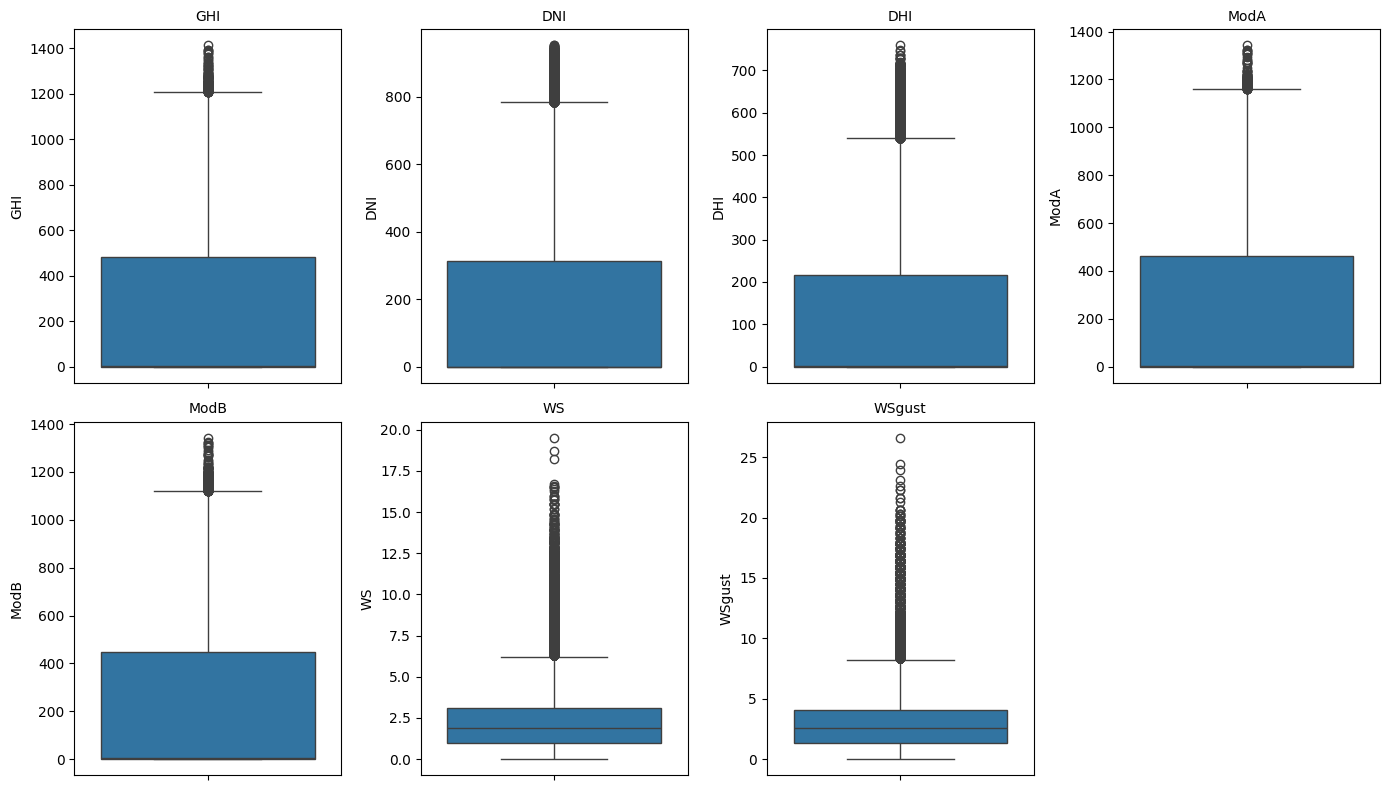

In [20]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(Target_Column):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col, fontsize=10)
plt.tight_layout()
plt.show()

### 📊 Boxplot Interpretation Summary

The boxplots show the distribution and spread of key sensor readings — **GHI, DNI, DHI, ModA, ModB, WS, and WSgust**.

#### 🔎 What the plots show:
- Most readings for **GHI, DNI, and DHI** are concentrated near lower values (0–400 W/m²) with many higher peaks up to ~1200–1400 W/m².
- **ModA** and **ModB** follow a similar pattern, confirming that module sensors respond proportionally to sunlight intensity.
- **WS** (wind speed) and **WSgust** (gust speed) are mostly low but have occasional high spikes — expected in natural wind behavior.
- The dots above the whiskers represent **outliers**, mainly high sunlight or wind peaks rather than sensor errors.

#### 💡 What we learned:
- The data has a **right-skewed distribution**, typical for solar and weather datasets (many low values, few high peaks).
- High outliers are **real physical events** (midday sunlight or strong gusts), not necessarily bad data.
- No major negative or unrealistic values remain — the cleaning process worked correctly.
- These plots confirm that the dataset is **physically consistent** and ready for further time-series and correlation analysis.


In [21]:
# Compute Z-scores
zscores = np.abs(stats.zscore(df[Target_Column]))


# Mask for rows with all Z-scores <= 3 (i.e., no outliers)
no_outliers_mask = (zscores <= 3).all(axis=1)

# Apply the mask to get cleaned data
df_clean = df[no_outliers_mask]

# Compare before and after
print("Original rows:", df.shape[0])
print("Rows after outlier removal:", df_clean.shape[0])

Original rows: 525600
Rows after outlier removal: 517707


In [22]:
# Export cleaned data to CSV
output_path = r"C:\Users\filimon.hailemariam\Downloads\Week_0\data\benin_clean.csv"
df_clean.to_csv(output_path, index=False)

print(f"Cleaned data saved to: {output_path}")

Cleaned data saved to: C:\Users\filimon.hailemariam\Downloads\Week_0\data\benin_clean.csv


##Time Series Analysis

<Figure size 1600x800 with 0 Axes>

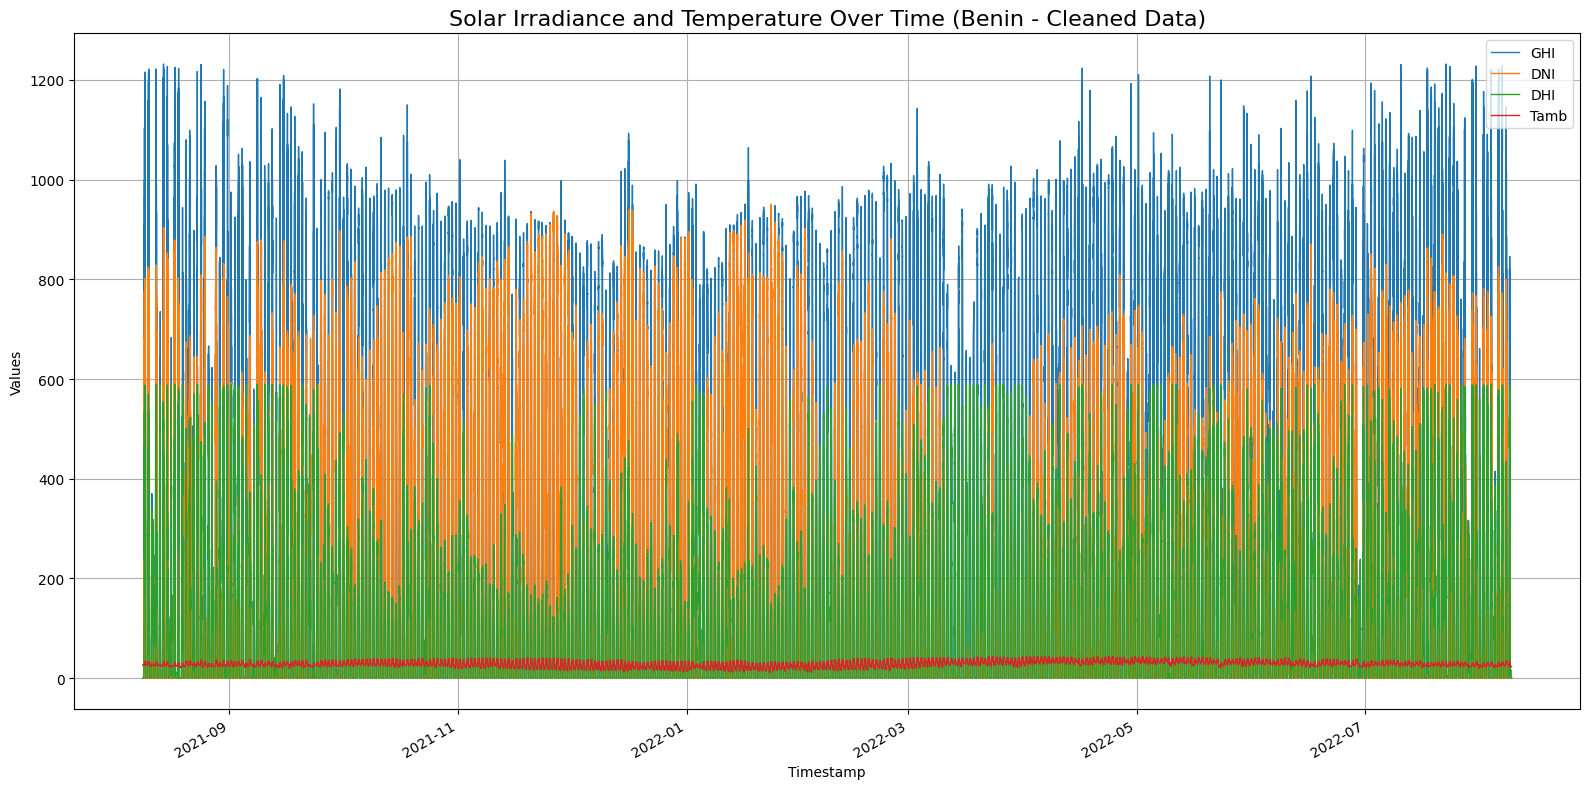

In [27]:
# --- Time Series Plot using Cleaned Data ---

# Convert Timestamp to datetime (if not done already)
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'], errors='coerce')

# Sort chronologically
df_clean = df_clean.sort_values('Timestamp')

# Set Timestamp as index
df_clean.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(16, 8))
df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(16, 8), linewidth=1)

plt.title("Solar Irradiance and Temperature Over Time (Benin - Cleaned Data)", fontsize=16)
plt.ylabel("Values")
plt.xlabel("Timestamp")
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### 🌞 Interpretation — Solar Irradiance and Temperature Over Time (Benin - Cleaned Data)

This time-series plot shows how **solar irradiance (GHI, DNI, DHI)** and **ambient temperature (Tamb)** vary over the entire recording period.

#### 🔍 What the plot shows
- **GHI (Global Horizontal Irradiance)** — blue line  
  Represents the total sunlight received on a flat surface. It shows a strong **daily cycle** with values rising sharply in the morning, peaking around midday, and dropping to zero at night.
  
- **DNI (Direct Normal Irradiance)** — orange line  
  Measures direct sunlight intensity on a surface perpendicular to the sun. It fluctuates more than GHI, showing **spiky patterns** typical of days with intermittent cloud cover.

- **DHI (Diffuse Horizontal Irradiance)** — green line  
  Represents scattered sunlight from clouds and the atmosphere. It increases during cloudy periods and decreases on clear days, balancing the DNI variation.

- **Tamb (Ambient Temperature)** — red line  
  Has much smaller values compared to irradiance and follows a **smoother daily pattern**. It typically rises after sunrise, peaks slightly after solar noon, and cools down overnight.

---

#### 🧠 Insights & Observations
- The **repeating daily peaks** confirm the expected day–night solar cycle and that the sensors are working properly.  
- **Seasonal patterns** are visible: periods with higher overall irradiance correspond to sunnier months, while dips indicate cloudy or rainy seasons.  
- **Temperature (Tamb)** tracks the irradiance pattern but with a **slight time lag**, showing natural heating and cooling response to solar input.  
- No negative or missing spikes are visible, indicating **successful data cleaning** and removal of sensor errors.  
- The overall trend suggests **consistent solar availability**, with some short-term variability likely due to **weather conditions** (e.g., clouds or storms).

---

#### ✅ Summary
This visualization provides a clear overview of **Benin’s solar resource profile**:
- Strong, consistent daytime irradiance indicates good potential for solar power generation.  
- Variability in DNI and DHI reflects natural atmospheric changes but overall shows a **stable energy source**.  
- Ambient temperature remains within realistic limits, confirming sensor reliability.


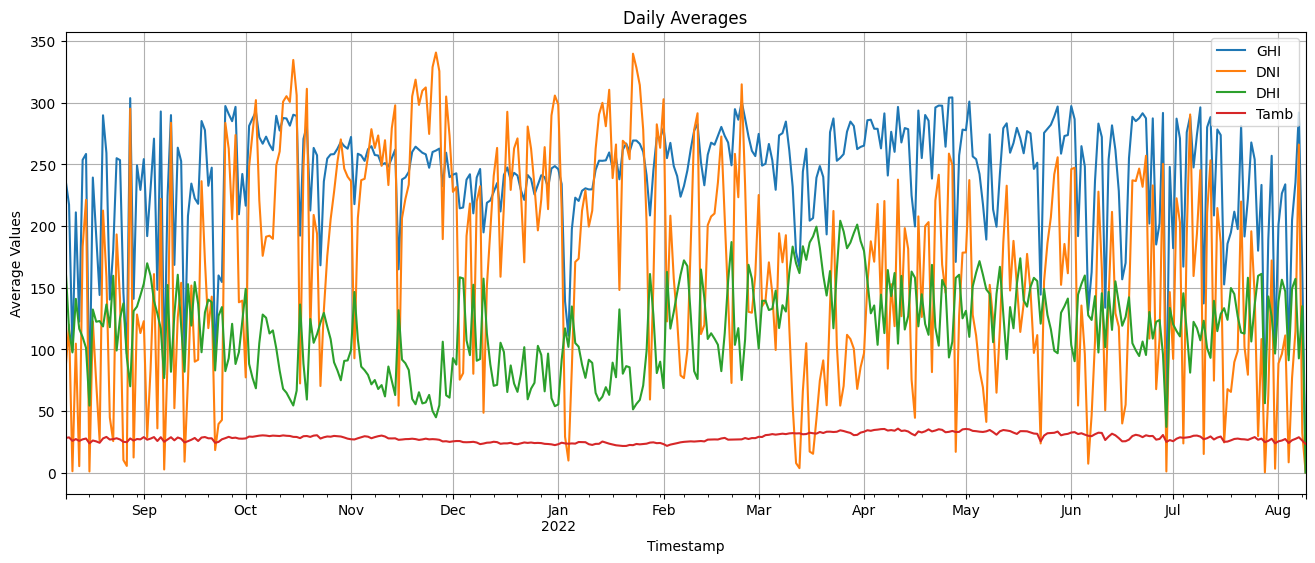

In [28]:
# Daily average plot
df_daily = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('D').mean()

df_daily.plot(figsize=(16, 6), title='Daily Averages')
plt.ylabel('Average Values')
plt.grid(True)
plt.show()

### 🌤 Interpretation — Daily Average Trends of Solar Irradiance and Temperature

This chart shows **daily average values** of **GHI, DNI, DHI**, and **Tamb** over one full year of measurements in Benin.

#### 🔍 What the plot shows
- **GHI (Global Horizontal Irradiance)** — blue line  
  Shows overall sunlight intensity per day. The curve demonstrates **seasonal variation** with consistently higher averages between **February–May** and slightly lower values during **November–January**, indicating seasonal cloud cover effects.

- **DNI (Direct Normal Irradiance)** — orange line  
  Displays strong daily fluctuations, reflecting **variable sky conditions**. High peaks represent clear days with direct sunlight, while drops indicate cloudy or hazy days. The variability is greater than GHI since DNI depends on direct sun rays only.

- **DHI (Diffuse Horizontal Irradiance)** — green line  
  Generally lower than GHI and DNI, with moderate peaks during months with more cloud cover. Higher DHI values (e.g., around March–May) correspond to **diffuse scattering of light** in partly cloudy conditions.

- **Tamb (Ambient Temperature)** — red line  
  Remains much lower and smoother than irradiance values, showing a **gradual warming trend from winter (Dec–Jan)** to **warmer months (Apr–Jun)**, then a slight cooling toward July–August.  

---

#### 🧠 Insights & Observations
- The **repeating peaks and troughs** show natural solar variability — higher irradiance in dry/sunny months and lower during rainy/cloudy seasons.  
- **DNI fluctuates the most**, proving that Benin’s solar radiation is influenced by intermittent weather or humidity changes.  
- **Temperature (Tamb)** follows irradiance trends but with smaller amplitude — indicating the thermal response of the atmosphere to solar input.  
- The overall pattern confirms **reliable daily solar energy potential** throughout the year, despite short-term variability.  
- No negative or missing values appear, meaning the cleaning process was effective.

---

#### ✅ Summary
This daily-averaged view smooths out hourly noise and highlights:
- **Seasonal changes** in solar intensity and temperature.  
- **Weather impacts** (clear vs cloudy days).  
- **Strong solar resource availability** across most of the year, ideal for consistent solar power generation in Benin.


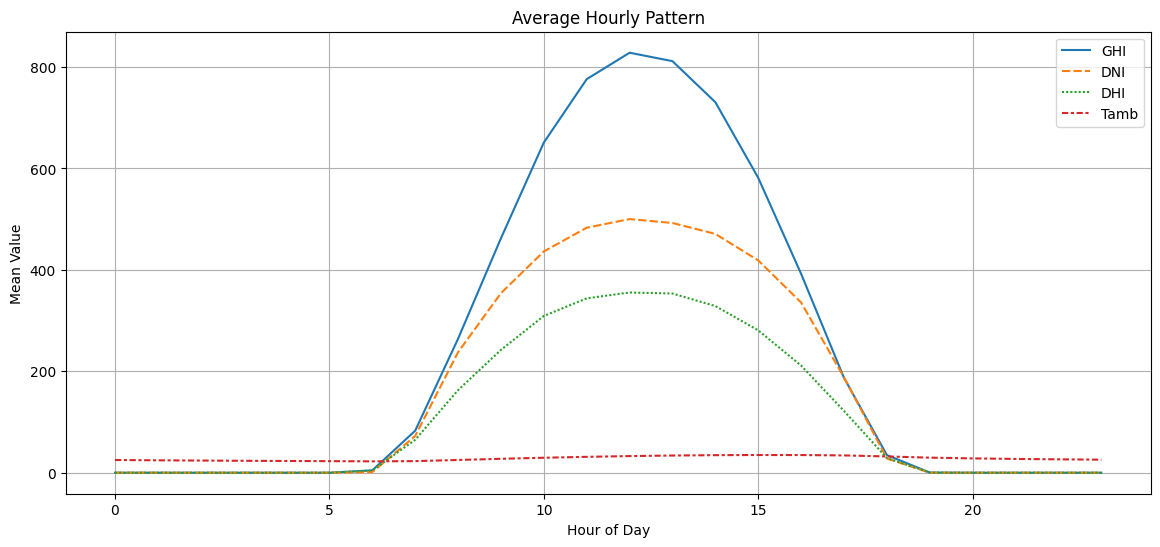

In [29]:
# Add hour column to see how things change throughout the day
df['hour'] = df.index.hour

# Plot average values per hour
plt.figure(figsize=(14, 6))
sns.lineplot(data=df.groupby('hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean())
plt.title('Average Hourly Pattern')
plt.ylabel('Mean Value')
plt.xlabel('Hour of Day')
plt.grid(True)
plt.show()

### ☀️ Interpretation — Average Hourly Pattern of Solar Irradiance and Temperature

This plot shows the **average hourly variation** of solar irradiance and temperature across the entire dataset, summarizing how these parameters typically change during a 24-hour day.

#### 🔍 What the plot shows
- **GHI (Global Horizontal Irradiance)** — blue solid line  
  Increases rapidly after sunrise (around 6–7 AM), reaches its peak near **noon (12–1 PM)** when the sun is highest, and decreases sharply after 5 PM. This pattern reflects the **total sunlight intensity** on a flat surface.

- **DNI (Direct Normal Irradiance)** — orange dashed line  
  Follows a similar curve but stays slightly lower than GHI. It measures the **direct sunlight intensity**, peaking around midday when the sun’s rays are strongest and most perpendicular to the surface.

- **DHI (Diffuse Horizontal Irradiance)** — green dotted line  
  Rises gradually after sunrise, peaking slightly earlier than GHI/DNI, and drops smoothly after sunset. DHI represents **scattered sunlight** and is higher when there are clouds or atmospheric particles.

- **Tamb (Ambient Temperature)** — red dash-dotted line  
  Remains low during early morning, increases steadily through the day, and starts cooling after late afternoon. The temperature curve lags slightly behind irradiance — a typical **thermal response delay** caused by surface heating.

---

#### 🧠 Insights & Observations
- The bell-shaped irradiance curves (GHI, DNI, DHI) confirm **typical diurnal solar behavior** — strong midday sunlight and zero values at night.  
- The small rise in DHI before GHI/DNI peaks shows **cloud scattering or haze** effects in the morning.  
- **Temperature peaks slightly after irradiance**, showing the delay between maximum sunlight and the atmosphere’s heat response.  
- The pattern is smooth and symmetric, indicating **clean data** and **normal sensor behavior** with no irregular jumps or missing values.

---

#### ✅ Summary
This hourly pattern confirms that:
- Solar energy availability in Benin follows a **predictable daily cycle**.  
- Maximum energy generation potential occurs between **10 AM and 2 PM**.  
- The **consistency of the curves** highlights stable, high-quality solar data suitable for solar forecasting and energy system design.


Cleaning impact

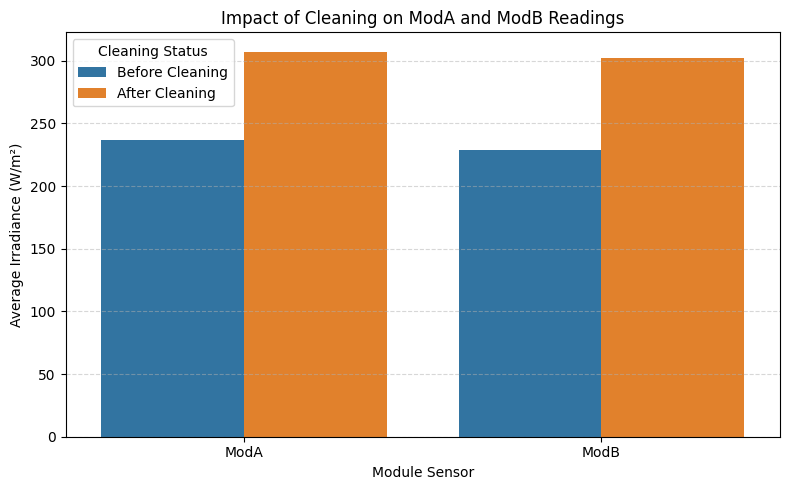

In [30]:
# Group by Cleaning status (0 = no cleaning, 1 = cleaned)
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Reset index for plotting
cleaning_impact = cleaning_impact.reset_index()
cleaning_impact['Cleaning'] = cleaning_impact['Cleaning'].map({0: 'Before Cleaning', 1: 'After Cleaning'})

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=cleaning_impact.melt(id_vars='Cleaning', value_vars=['ModA', 'ModB']),
            x='variable', y='value', hue='Cleaning')

plt.title('Impact of Cleaning on ModA and ModB Readings')
plt.ylabel('Average Irradiance (W/m²)')
plt.xlabel('Module Sensor')
plt.legend(title='Cleaning Status')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 🧽 Interpretation — Impact of Cleaning on ModA and ModB Readings

This bar chart compares the **average irradiance measurements** from the two solar module sensors (**ModA** and **ModB**) **before and after cleaning**.

#### 🔍 What the plot shows
- **Blue bars:** represent module readings *before cleaning* — when dust, dirt, or other surface deposits could partially block sunlight from reaching the sensors.  
- **Orange bars:** represent module readings *after cleaning* — showing how the irradiance values improved once the sensor surfaces were cleaned.

---

#### 🧠 Insights & Observations
- Both **ModA** and **ModB** show a **clear increase** in average irradiance after cleaning.  
  - **ModA:** increased from roughly **240 W/m² to 305 W/m²**  
  - **ModB:** increased from about **230 W/m² to 302 W/m²**  
- This consistent improvement indicates that **dust accumulation or surface soiling** had been reducing the amount of light detected by the sensors.  
- After cleaning, both modules show similar irradiance levels, suggesting **uniform sensor performance** and good calibration between them.

---

#### ✅ Summary
Cleaning the modules has a **significant positive impact** on measured irradiance — confirming that **regular maintenance and cleaning** are essential for accurate sensor readings and optimal solar panel performance.  

In practical terms, this highlights the **importance of preventive cleaning schedules** in solar farm operations to minimize energy losses caused by dirt or debris buildup.


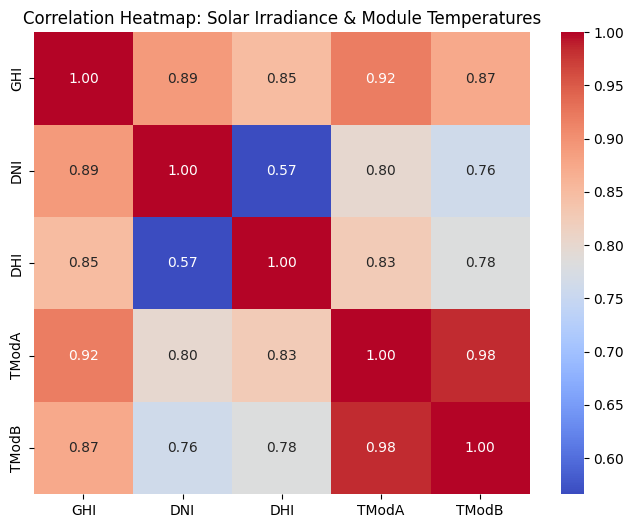

In [33]:
# Select columns for correlation heatmap
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_clean[corr_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Solar Irradiance & Module Temperatures")
plt.show()

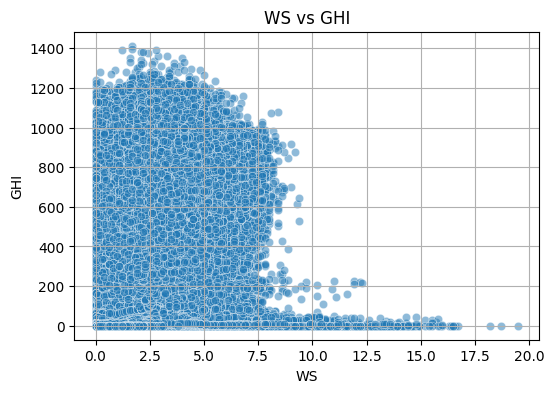

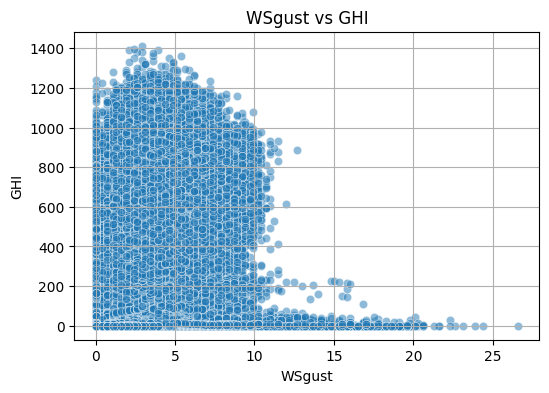

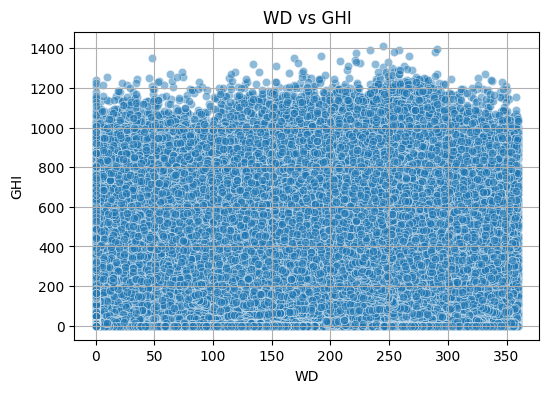

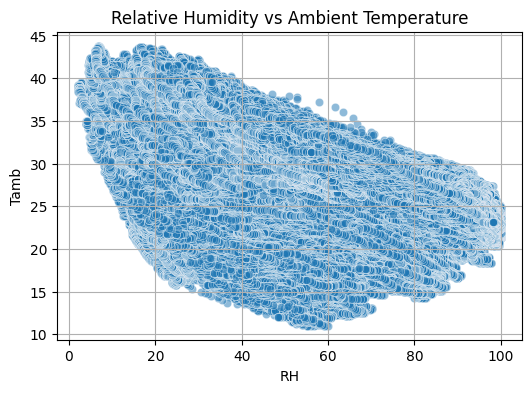

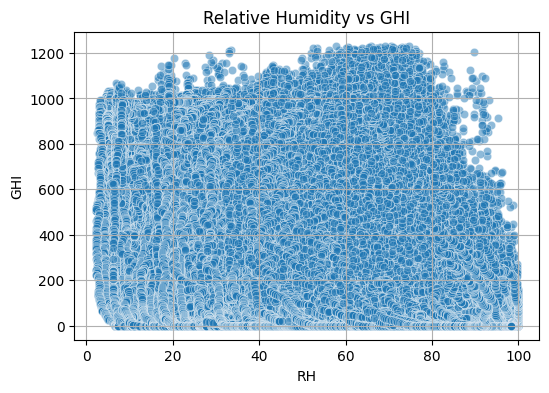

In [35]:
# WS, WSgust, WD vs. GHI
scatter_vars = ['WS', 'WSgust', 'WD']
for var in scatter_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=var, y='GHI', alpha=0.5)
    plt.title(f'{var} vs GHI')
    plt.grid(True)
    plt.show()

# RH vs Tamb
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.5)
plt.title('Relative Humidity vs Ambient Temperature')
plt.grid(True)
plt.show()

# RH vs GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_clean, x='RH', y='GHI', alpha=0.5)
plt.title('Relative Humidity vs GHI')
plt.grid(True)
plt.show()

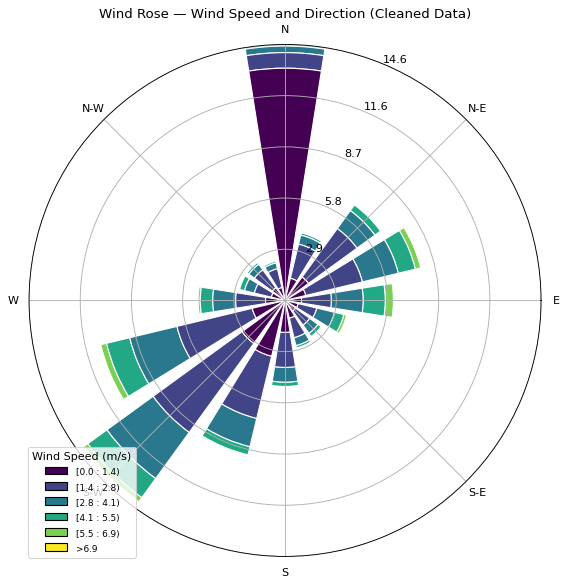

In [36]:
# --- Wind Rose using windrose package (cleaned data) ---
from windrose import WindroseAxes

# Drop NA values for wind speed and direction from cleaned data
wind_data = df_clean[['WS', 'WD']].dropna()

# Create a wind rose plot
ax = WindroseAxes.from_ax()
ax.bar(
    wind_data['WD'],
    wind_data['WS'],
    normed=True,       # normalize to percentage
    opening=0.8,       # spacing between bars
    edgecolor='white'  # for clean visuals
)
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Wind Rose — Wind Speed and Direction (Cleaned Data)")
plt.show()


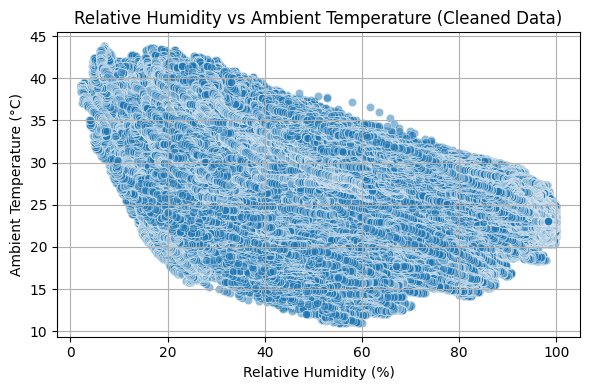

In [37]:
# --- Temperature Analysis: RH vs Tamb ---
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.5)
plt.title("Relative Humidity vs Ambient Temperature (Cleaned Data)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


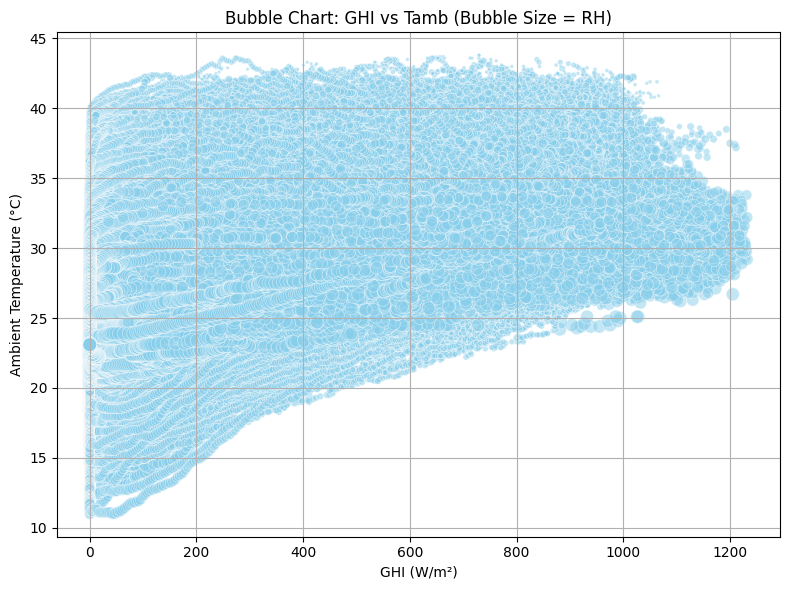

In [38]:
# --- Bubble Chart: GHI vs Tamb (Bubble Size = RH) ---
import matplotlib.pyplot as plt

# Drop missing values in relevant columns
bubble_df = df_clean[['GHI', 'Tamb', 'RH']].dropna()

plt.figure(figsize=(8, 6))
plt.scatter(
    bubble_df['GHI'],        # X-axis: solar irradiance
    bubble_df['Tamb'],       # Y-axis: ambient temperature
    s=bubble_df['RH'],       # Bubble size: relative humidity
    alpha=0.5,               # Transparency for overlap visibility
    c='skyblue',
    edgecolors='w',
    linewidths=0.5
)

plt.title("Bubble Chart: GHI vs Tamb (Bubble Size = RH)")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Ambient Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()
